# Analysis for salmon trap data in the Dungenesss River from 2011
### Description of data:
Data is stored in MS Excel files with one sheet per year. For 2011, the counts for wild and hatchery fish are separate.


In [69]:
#imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlopen
from bs4 import BeautifulSoup
import io
import datetime
import matplotlib.dates as mdates

In [70]:
year = "2011"
# #read file in Windows
try:
    df_year = pd.read_excel(
   io="C:/Users/maria/OneDrive/Documents/data/pied_piper/Dungeness smolt trap 2005 - 2014.xlsx",
   sheet_name =year,
    header = [0,1,2,3]
)
except PermissionError:
    print("Permission Error. Close the file, if it is open.")
    

df_year.head()
columns = list(df_year)

df_year = df_year.iloc[:-4] #remove last line which has no data

list_names = []
for col in df_year.columns.values:
    
    check0 = str(col[0])
    check2 = str(col[2])
    check3 = str(col[3])
    if check3[0].isdigit():
        
        list_names.append(str(col[0]) + '_' + str(col[1]) + '_' + str(col[2]))
            
    elif check2[0].isdigit():
        
        list_names.append(str(col[0]) + '_' + str(col[1]))
        
    elif check0 == 'Trapping Intervals':
        list_names.append(str(col[2]) + '_' + str(col[3]))
    
df_year.columns = list_names

#rename columns to be consistent with previous years
df_year = df_year.rename(columns={'Down_Date': "Date",
                        'Up_Time': "Up_time",
                        'Down_Time': "Down_time",          
                        'Up_Up': "Up_date",
                        'In_TimeIn': "In",
                        'Out_TimeOut': "Out"})
#make columns that are consistent with previous years
df_year['Up'] = df_year['Up_date'] + pd.to_timedelta(df_year["Up_time"].astype(str))
df_year['Down'] = df_year['Date'] + pd.to_timedelta(df_year["Down_time"].astype(str))
df_year['midpoint'] = df_year['Down'] + (df_year['Up'] - df_year['Down'])/2

#get rid of columns with Out !=0 and fill 0 instead of NANs
df_year= df_year[df_year['Out'] == 0]
df_year.fillna(0, inplace=True)

C:\Users\maria\anaconda3\lib\site-packages\pandas\core\arrays\datetimelike.py:1187: PerformanceWarning: Adding/subtracting object-dtype array to TimedeltaArray not vectorized
  warnings.warn(


In [71]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_year)

,Date,Down_time,Up_date,Up_time,In,Out,Chinook0_Total,Chinook0_Hatchery_Unmark,Chinook0_Hatchery_CWT,Chinook0_Wild_Unmark,Chinook1_Total,Chinook1_Hatchery_CWT,Chinook1_Wild_Unmark,Coho1_Total,Coho1_Hatchery_Ad-mark,Coho1_Hatchery_Unmark,Coho1_Wild_UC mark,Coho1_Wild_Unmark,Chum_Wild_Unmarked,Coho Fry_Wild_Unmarked,Pink_Wild_Unmark,Steelhead Smolts_Total,Steelhead Smolts_Hatchery_Unmark,Steelhead Smolts_Hatchery_Ad-mark,Steelhead Smolts_Wild_UC mark,Steelhead Smolts_Wild_Unmark,Cutthroat_Wild_Smolt,Trout Parr_Wild_Total,Dolly\Bull_Wild_Smolt,Up,Down,midpoint
0,2011-02-08,15:00:00,2011-02-09,08:30:00,17.500000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011-02-09 08:30:00,2011-02-08 15:00:00,2011-02-08 23:45:00
1,2011-02-09,08:30:00,2011-02-09,17:45:00,9.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011-02-09 17:45:00,2011-02-09 08:30:00,2011-02-09 13:07:30
2,2011-02-09,17:45:00,2011-02-10,07:55:00,14.166667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011-02-10 07:55:00,2011-02-09 17:45:00,2011-02-10 00:50:00
3,2011-02-10,07:55:00,2011-02-10,17:40:00,9.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011-02-10 17:40:00,2011-02-10 07:55:00,2011-02-10 12:47:30
4,2011-02-10,17:40:00,2011-02-11,08:00:00,14.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011-02-11 08:00:00,2011-02-10 17:40:00,2011-02-11 00:50:00
5,2011-02-11,08:00:00,2011-02-11,21:30:00,13.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011-02-11 21:30:00,2011-02-11 08:00:00,2011-02-11 14:45:00
6,2011-02-11,21:30:00,2011-02-12,07:45:00,10.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011-02-12 07:45:00,2011-02-11 21:30:00,2011-02-12 02:37:30
7,2011-02-12,07:45:00,2011-02-12,21:00:00,13.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011-02-12 21:00:00,2011-02-12 07:45:00,2011-02-12 14:22:30
8,2011-02-12,21:00:00,2011-02-13,08:30:00,11.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011-02-13 08:30:00,2011-02-12 21:00:00,2011-02-13 02:45:00
9,2011-02-13,08:30:00,2011-02-13,18:00:00,9.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011-02-13 18:00:00,2011-02-13 08:30:00,2011-02-13 13:15:00


In [72]:
#getting temperature data
#reading html data

url = "https://apps.ecology.wa.gov/ContinuousFlowAndWQ/StationData/Prod/18A050/18A050_" + year + "_WTM_FM.TXT"
html = urlopen(url).read()
soup = BeautifulSoup(html, features="html.parser")

# kill all script and style elements
for script in soup(["script", "style"]):
    script.extract()    # rip it out

# get text
text = soup.get_text()

url_flow = "https://apps.ecology.wa.gov/ContinuousFlowAndWQ/StationData/Prod/18A050/18A050_" + year+ "_DSG_FM.TXT"
html_flow = urlopen(url_flow).read()
soup_flow = BeautifulSoup(html_flow, features="html.parser")

# kill all script and style elements
for script in soup_flow(["script", "style"]):
    script.extract()    # rip it out


text_flow = soup_flow.get_text()
text = text[522:-72]
text_flow = text_flow[519:-216]

df = pd.read_csv(io.StringIO(text), sep='\s+', header = None, names = ["date", "time", "temp", "quality"])
df_flow = pd.read_csv(io.StringIO(text_flow), sep='\s+', header = None, names = ["date", "time", "flow", "quality"])


In [73]:
df['midpoint'] =  pd.to_datetime(df['date'] + ' ' + df['time'])

df_year_temp = pd.merge_asof(df_year.dropna(subset = ['midpoint']),df, on="midpoint",tolerance=pd.Timedelta(minutes = 15))

df_flow['midpoint'] =  pd.to_datetime(df_flow['date'] + ' ' + df_flow['time'])

df_year_temp_flow = pd.merge_asof(
    df_year_temp.dropna(subset = ['midpoint']),df_flow, on="midpoint",tolerance=pd.Timedelta(minutes = 15))

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_year_temp_flow)

,Date,Down_time,Up_date,Up_time,In,Out,Chinook0_Total,Chinook0_Hatchery_Unmark,Chinook0_Hatchery_CWT,Chinook0_Wild_Unmark,Chinook1_Total,Chinook1_Hatchery_CWT,Chinook1_Wild_Unmark,Coho1_Total,Coho1_Hatchery_Ad-mark,Coho1_Hatchery_Unmark,Coho1_Wild_UC mark,Coho1_Wild_Unmark,Chum_Wild_Unmarked,Coho Fry_Wild_Unmarked,Pink_Wild_Unmark,Steelhead Smolts_Total,Steelhead Smolts_Hatchery_Unmark,Steelhead Smolts_Hatchery_Ad-mark,Steelhead Smolts_Wild_UC mark,Steelhead Smolts_Wild_Unmark,Cutthroat_Wild_Smolt,Trout Parr_Wild_Total,Dolly\Bull_Wild_Smolt,Up,Down,midpoint,date_x,time_x,temp,quality_x,date_y,time_y,flow,quality_y
0,2011-02-08,15:00:00,2011-02-09,08:30:00,17.500000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011-02-09 08:30:00,2011-02-08 15:00:00,2011-02-08 23:45:00,02/08/2011,23:45,3.3,140.0,02/08/2011,23:45,403,2.0
1,2011-02-09,08:30:00,2011-02-09,17:45:00,9.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011-02-09 17:45:00,2011-02-09 08:30:00,2011-02-09 13:07:30,02/09/2011,13:00,3.6,140.0,02/09/2011,13:00,378,2.0
2,2011-02-09,17:45:00,2011-02-10,07:55:00,14.166667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011-02-10 07:55:00,2011-02-09 17:45:00,2011-02-10 00:50:00,02/10/2011,00:45,2.9,140.0,02/10/2011,00:45,367,2.0
3,2011-02-10,07:55:00,2011-02-10,17:40:00,9.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011-02-10 17:40:00,2011-02-10 07:55:00,2011-02-10 12:47:30,02/10/2011,12:45,3.2,140.0,02/10/2011,12:45,360,2.0
4,2011-02-10,17:40:00,2011-02-11,08:00:00,14.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011-02-11 08:00:00,2011-02-10 17:40:00,2011-02-11 00:50:00,02/11/2011,00:45,2.7,140.0,02/11/2011,00:45,347,2.0
5,2011-02-11,08:00:00,2011-02-11,21:30:00,13.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011-02-11 21:30:00,2011-02-11 08:00:00,2011-02-11 14:45:00,02/11/2011,14:45,3.8,140.0,02/11/2011,14:45,340,2.0
6,2011-02-11,21:30:00,2011-02-12,07:45:00,10.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011-02-12 07:45:00,2011-02-11 21:30:00,2011-02-12 02:37:30,02/12/2011,02:30,3.6,140.0,02/12/2011,02:30,330,2.0
7,2011-02-12,07:45:00,2011-02-12,21:00:00,13.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011-02-12 21:00:00,2011-02-12 07:45:00,2011-02-12 14:22:30,02/12/2011,14:15,4.5,140.0,02/12/2011,14:15,326,2.0
8,2011-02-12,21:00:00,2011-02-13,08:30:00,11.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011-02-13 08:30:00,2011-02-12 21:00:00,2011-02-13 02:45:00,02/13/2011,02:45,3.8,140.0,02/13/2011,02:45,536,2.0
9,2011-02-13,08:30:00,2011-02-13,18:00:00,9.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011-02-13 18:00:00,2011-02-13 08:30:00,2011-02-13 13:15:00,02/13/2011,13:15,4.3,140.0,02/13/2011,13:15,456,2.0


In [74]:
df_year_temp_flow = df_year_temp_flow.rename(columns={'Chinook0_Hatchery_CWT':'Chinook0_Hat1',
                                                      'Chinook0_Hatchery_Unmark':'Chinook0_Hat',
                                                      'Chinook0_Wild_Unmark':'Chinook0_Wild',
                                                      'Chinook1_Hatchery_CWT':'Chinook1_Hat',
                                                      'Chinook1_Wild_Unmark':'Chinook1_Wild',
                                                      'Coho1_Hatchery_Ad-mark':'Coho1_Hat',
                                                      'Coho1_Hatchery_Unmark':'Coho1_Hat1',
                                                      'Coho1_Wild_UC mark':'Coho1_Wild',
                                                      'Coho1_Wild_Unmark':'Coho1_Wild1',
                                                      'Steelhead Smolts_Total':'Steelhead1_Total',
                                                      'Steelhead Smolts_Hatchery_Ad-mark':'Steelhead1_Hat',
                                                      'Steelhead Smolts_Hatchery_Unmark':'Steelhead1_Hat1',
                                                      'Steelhead Smolts_Wild_Unmark':'Steelhead1_Wild',
                                                      'Steelhead Smolts_Wild_UC mark':'Steelhead1_Wild1',
                                                      'Trout Parr_Wild_Total':'Trout Parr_Wild_Steelhead'})
#aggregating data
groupedby_dates_year = df_year_temp_flow.groupby(by=["Date"]).agg({'In':'sum',
                                                                   'Out':'sum',
                                                                   'Chinook0_Total':'sum',
                                                                   'Chinook0_Hat':'sum',
                                                                   'Chinook0_Hat1':'sum',
                                                                   'Chinook0_Wild':'sum',
                                                                   'Chinook1_Total':'sum',
                                                                   'Chinook1_Hat':'sum',
                                                                   'Chinook1_Wild':'sum',
                                                                   'Coho1_Total':'sum',
                                                                   'Coho1_Hat':'sum',
                                                                   'Coho1_Hat1':'sum',
                                                                   'Coho1_Wild':'sum',
                                                                   'Coho1_Wild1':'sum',
                                                                   'Steelhead1_Total':'sum',
                                                                   'Steelhead1_Wild':'sum',
                                                                   'Steelhead1_Wild1':'sum',
                                                                   'Steelhead1_Hat':'sum',
                                                                   'Steelhead1_Hat1':'sum',
                                                                   'Trout Parr_Wild_Steelhead':'sum',
                                                                   'temp':'mean',
                                                                   'flow':'mean'})

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(groupedby_dates_year)
    

,In,Out,Chinook0_Total,Chinook0_Hat,Chinook0_Hat1,Chinook0_Wild,Chinook1_Total,Chinook1_Hat,Chinook1_Wild,Coho1_Total,Coho1_Hat,Coho1_Hat1,Coho1_Wild,Coho1_Wild1,Steelhead1_Total,Steelhead1_Wild,Steelhead1_Wild1,Steelhead1_Hat,Steelhead1_Hat1,Trout Parr_Wild_Steelhead,temp,flow
Date,,,,,,,,,,,,,,,,,,,,,,
2011-02-08,17.500000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.30,403.0
2011-02-09,23.416667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.25,372.5
2011-02-10,24.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.95,353.5
2011-02-11,23.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.70,335.0
2011-02-12,24.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.15,431.0
2011-02-13,23.250000,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.10,438.0
2011-02-14,24.583333,0.0,11.0,0.0,0.0,11.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.50,511.5
2011-02-15,23.666667,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.85,525.5
2011-02-16,24.500000,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.75,454.0


In [75]:
#calculate fish per hour
#chinook 0
groupedby_dates_year['chinook0_perhour'] = groupedby_dates_year['Chinook0_Total']/groupedby_dates_year['In']
groupedby_dates_year['chinook0_hatchery_perhour'] = (
    groupedby_dates_year['Chinook0_Hat']+groupedby_dates_year['Chinook0_Hat1'])/groupedby_dates_year['In']
groupedby_dates_year['chinook0_wild_perhour'] = groupedby_dates_year['Chinook0_Wild']/groupedby_dates_year['In']

#chinook 1
groupedby_dates_year['chinook1_perhour'] = groupedby_dates_year['Chinook1_Total']/groupedby_dates_year['In']
groupedby_dates_year['chinook1_hatchery_perhour'] = (
    groupedby_dates_year['Chinook1_Hat'] )/groupedby_dates_year['In']
groupedby_dates_year['chinook1_wild_perhour'] = groupedby_dates_year['Chinook1_Wild']/groupedby_dates_year['In']

#coho 1
groupedby_dates_year['coho1_perhour'] = groupedby_dates_year['Coho1_Total']/groupedby_dates_year['In']
groupedby_dates_year['coho1_hatchery_perhour'] = (
    groupedby_dates_year['Coho1_Hat'] + groupedby_dates_year['Coho1_Hat1'])/groupedby_dates_year['In']
groupedby_dates_year['coho1_wild_perhour'] = (groupedby_dates_year['Coho1_Wild']+groupedby_dates_year['Coho1_Wild1'])/groupedby_dates_year['In']

#steelhead
groupedby_dates_year['steelheadsmolt_perhour'] = groupedby_dates_year['Steelhead1_Total']/groupedby_dates_year['In']
groupedby_dates_year['steelheadsmolt_hatchery_perhour'] = (
    groupedby_dates_year['Steelhead1_Hat']+groupedby_dates_year['Steelhead1_Hat1'])/groupedby_dates_year['In']
groupedby_dates_year['steelheadsmolt_wild_perhour'] = (
    groupedby_dates_year['Steelhead1_Wild']+groupedby_dates_year['Steelhead1_Wild1'])/groupedby_dates_year['In']
groupedby_dates_year['steelheadsmolt_parr_perhour'] = groupedby_dates_year['Trout Parr_Wild_Steelhead']/groupedby_dates_year['In']


In [76]:
#function to plot fish per hour

def plot_fish_perhour(groupedby_dates_year, species = "chinook", year = "0", types=["hatchery", "wild", "total"]):
    
    fs = 18
    lw = 3
    transparency = 0.5
    plt.close('all') # always start by cleaning up
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(111)
    for fish_type in types:

        if fish_type == "total":
            x_string = species + year + "_" + "perhour"
            fish_color = "gray"
        if fish_type == "wild":  
            x_string = species + year +"_" + "wild" + "_" + "perhour"
            fish_color = "salmon"
        if fish_type == "hatchery":  
            x_string = species + year +"_" + "hatchery" + "_" + "perhour"
            fish_color = "seagreen"
        if fish_type == "parr":  
            x_string = species + year +"_" + "parr" + "_" + "perhour"
            fish_color = "orangered"


        
        ax1.plot(
            groupedby_dates_year.index, groupedby_dates_year[x_string], color = fish_color,
            label = fish_type, alpha = 0.5, linewidth = lw)
    plt.gcf().autofmt_xdate()
    plt.xlabel('Date', size = 0.9*fs)
    plt.ylabel(species + " " +year + "+" + ' counts per hour', size = 0.9*fs)
    ax1.tick_params(labelsize=.8*fs)
    ax1.set_title(species + " " +year + "+" + ' counts', loc='left', fontsize = fs*1.5)
    plt.legend(fontsize=fs, loc='upper right', title = '')

    plt.show()

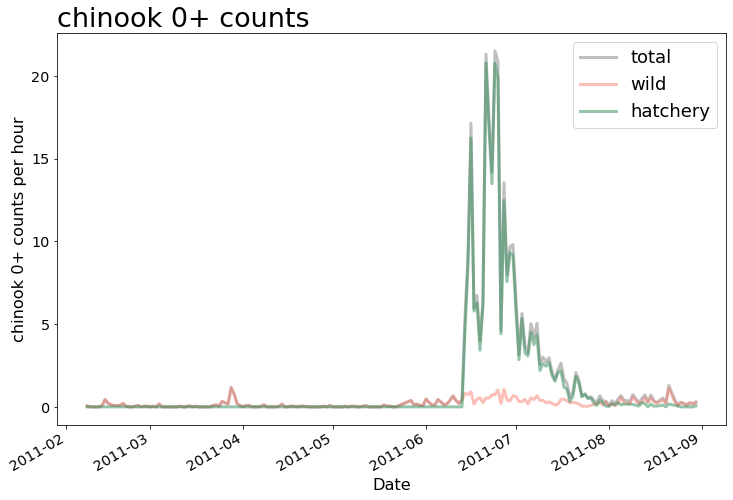

In [77]:
#chinook0
plot_fish_perhour(groupedby_dates_year,"chinook","0",["total","wild","hatchery"])

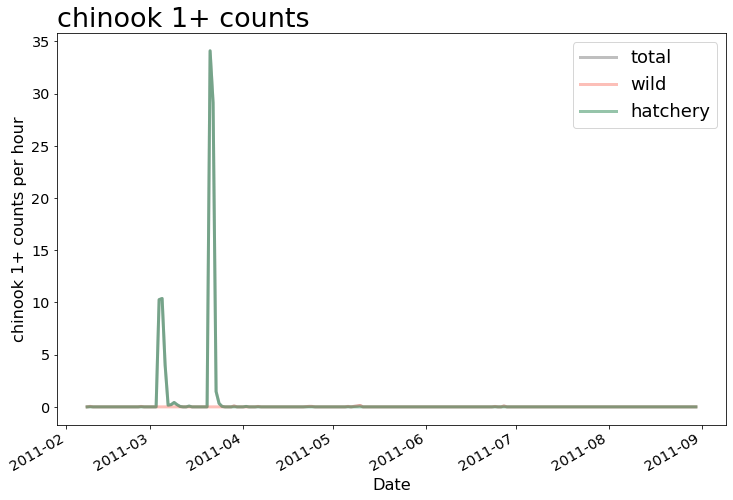

In [49]:
#chinook1
plot_fish_perhour(groupedby_dates_year,"chinook","1",["total","wild","hatchery"])

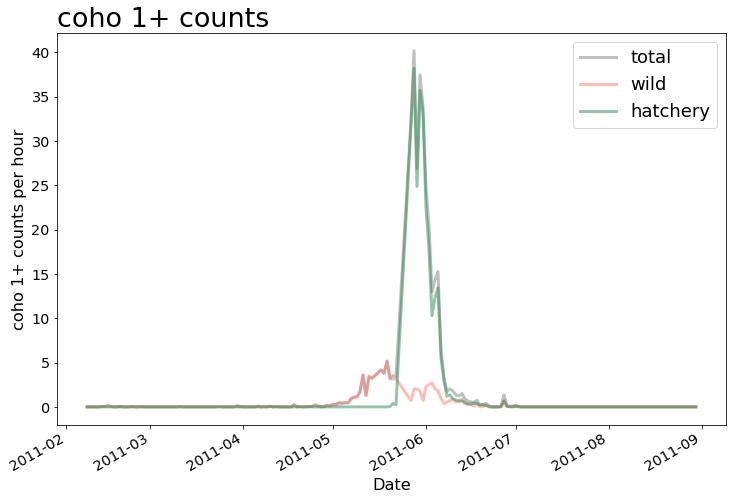

In [50]:
#coho1
plot_fish_perhour(groupedby_dates_year,"coho","1",["total","wild","hatchery"])

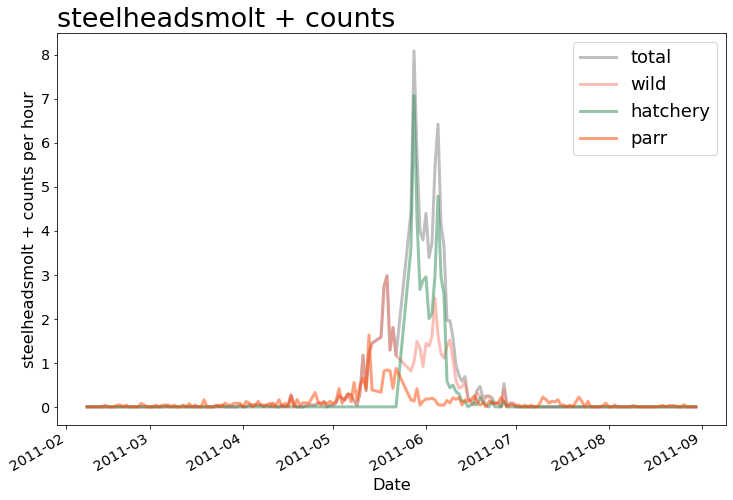

In [51]:
#steelhead
plot_fish_perhour(groupedby_dates_year,"steelheadsmolt","",["total","wild","hatchery","parr"])

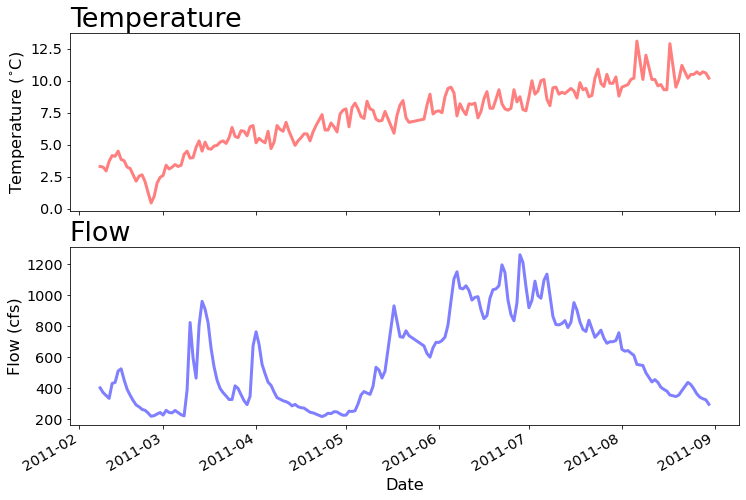

In [52]:
#plot temperature and flow
fs = 18
lw = 3
transparency = 0.5
plt.close('all') # always start by cleaning up
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
ax1.plot(
    groupedby_dates_year.index, groupedby_dates_year['temp'], color = 'red', 
    label = 'temperature', alpha = 0.5, linewidth = lw)
plt.gcf().autofmt_xdate()
plt.xlabel('Date', size = 0.9*fs)
plt.ylabel('Temperature '+ r'($^{\circ}$C)', size = 0.9*fs)
ax1.tick_params(labelsize=.8*fs)
ax1.set_title('Temperature', loc='left', fontsize = fs*1.5)
#plt.legend(fontsize=fs, loc='upper right', title = '')


#flow
ax2 = fig.add_subplot(212)
ax2.plot(
    groupedby_dates_year.index, groupedby_dates_year['flow'], color = 'blue', 
    label = 'flow', alpha = 0.5, linewidth = lw)
plt.gcf().autofmt_xdate()
plt.xlabel('Date', size = 0.9*fs)
plt.ylabel('Flow (cfs)', size = 0.9*fs)
ax2.tick_params(labelsize=.8*fs)
ax2.set_title('Flow', loc='left', fontsize = fs*1.5)
#plt.legend(fontsize=fs, loc='upper right', title = '')

plt.show()

In [53]:
groupedby_dates_year.to_csv("C:/Users/maria/OneDrive/Documents/data/pied_piper/2011_dungeness.csv")  
df_year_temp_flow.to_csv("C:/Users/maria/OneDrive/Documents/data/pied_piper/2011_dungeness_all.csv")

In [54]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_year_temp_flow)
    

,Date,Down_time,Up_date,Up_time,In,Out,Chinook0_Total,Chinook0_Hat,Chinook0_Hat1,Chinook0_Wild,Chinook1_Total,Chinook1_Hat,Chinook1_Wild,Coho1_Total,Coho1_Hat,Coho1_Hat1,Coho1_Wild,Coho1_Wild1,Chum_Wild_Unmarked,Coho Fry_Wild_Unmarked,Pink_Wild_Unmark,Steelhead1_Total,Steelhead1_Hat1,Steelhead1_Hat,Steelhead1_Wild1,Steelhead1_Wild,Cutthroat_Wild_Smolt,Trout Parr_Wild_Steelhead,Dolly\Bull_Wild_Smolt,Up,Down,midpoint,date_x,time_x,temp,quality_x,date_y,time_y,flow,quality_y
0,2011-02-08,15:00:00,2011-02-09,08:30:00,17.500000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011-02-09 08:30:00,2011-02-08 15:00:00,2011-02-08 23:45:00,02/08/2011,23:45,3.3,140.0,02/08/2011,23:45,403,2.0
1,2011-02-09,08:30:00,2011-02-09,17:45:00,9.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011-02-09 17:45:00,2011-02-09 08:30:00,2011-02-09 13:07:30,02/09/2011,13:00,3.6,140.0,02/09/2011,13:00,378,2.0
2,2011-02-09,17:45:00,2011-02-10,07:55:00,14.166667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011-02-10 07:55:00,2011-02-09 17:45:00,2011-02-10 00:50:00,02/10/2011,00:45,2.9,140.0,02/10/2011,00:45,367,2.0
3,2011-02-10,07:55:00,2011-02-10,17:40:00,9.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011-02-10 17:40:00,2011-02-10 07:55:00,2011-02-10 12:47:30,02/10/2011,12:45,3.2,140.0,02/10/2011,12:45,360,2.0
4,2011-02-10,17:40:00,2011-02-11,08:00:00,14.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011-02-11 08:00:00,2011-02-10 17:40:00,2011-02-11 00:50:00,02/11/2011,00:45,2.7,140.0,02/11/2011,00:45,347,2.0
5,2011-02-11,08:00:00,2011-02-11,21:30:00,13.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011-02-11 21:30:00,2011-02-11 08:00:00,2011-02-11 14:45:00,02/11/2011,14:45,3.8,140.0,02/11/2011,14:45,340,2.0
6,2011-02-11,21:30:00,2011-02-12,07:45:00,10.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011-02-12 07:45:00,2011-02-11 21:30:00,2011-02-12 02:37:30,02/12/2011,02:30,3.6,140.0,02/12/2011,02:30,330,2.0
7,2011-02-12,07:45:00,2011-02-12,21:00:00,13.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011-02-12 21:00:00,2011-02-12 07:45:00,2011-02-12 14:22:30,02/12/2011,14:15,4.5,140.0,02/12/2011,14:15,326,2.0
8,2011-02-12,21:00:00,2011-02-13,08:30:00,11.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011-02-13 08:30:00,2011-02-12 21:00:00,2011-02-13 02:45:00,02/13/2011,02:45,3.8,140.0,02/13/2011,02:45,536,2.0
9,2011-02-13,08:30:00,2011-02-13,18:00:00,9.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011-02-13 18:00:00,2011-02-13 08:30:00,2011-02-13 13:15:00,02/13/2011,13:15,4.3,140.0,02/13/2011,13:15,456,2.0


In [78]:
df_midpoint = df_year_temp_flow.set_index('midpoint')

groupedby_time_year = df_midpoint.groupby(df_midpoint.index.floor('60T').time).sum()
# print(df_midpoint)

groupedby_time_year_subset = groupedby_time_year[['Chinook0_Hat',
                                                  'Chinook0_Hat1',
                                                  'Chinook0_Wild',
                                                  'Chinook1_Hat',
                                                  'Chinook1_Wild',
                                                  'Coho1_Wild',
                                                  'Coho1_Wild1',
                                                  'Coho1_Hat',
                                                  'Coho1_Hat1',
                                                  'Steelhead1_Hat',
                                                  'Steelhead1_Hat1',
                                                  'Steelhead1_Wild',
                                                  'Steelhead1_Wild1',
                                                  'Trout Parr_Wild_Steelhead']].div(groupedby_time_year['In'],axis = 0)

groupedby_time_year_subset['Chinook0_Hat_all'] = (
    groupedby_time_year_subset['Chinook0_Hat']+groupedby_time_year_subset['Chinook0_Hat1'])

groupedby_time_year_subset['Chinook0_Hat_prop'] = groupedby_time_year_subset['Chinook0_Hat_all']/groupedby_time_year_subset['Chinook0_Hat_all'].sum()

groupedby_time_year_subset['Chinook0_Wild_prop'] = groupedby_time_year_subset['Chinook0_Wild']/groupedby_time_year_subset['Chinook0_Wild'].sum()



groupedby_time_year_subset['Chinook1_Hat_all'] = (
    groupedby_time_year_subset['Chinook1_Hat'])

groupedby_time_year_subset['Chinook1_Hat_prop'] = (
    groupedby_time_year_subset['Chinook1_Hat_all'])/groupedby_time_year_subset['Chinook1_Hat_all'].sum()

groupedby_time_year_subset['Chinook1_Wild_prop'] = groupedby_time_year_subset['Chinook1_Wild']/groupedby_time_year_subset['Chinook1_Wild'].sum()



groupedby_time_year_subset['Coho1_Wild_all'] = groupedby_time_year_subset['Coho1_Wild']+groupedby_time_year_subset['Coho1_Wild1']

groupedby_time_year_subset['Coho1_Wild_prop'] = groupedby_time_year_subset['Coho1_Wild_all']/groupedby_time_year_subset['Coho1_Wild_all'].sum()

groupedby_time_year_subset['Coho1_Hat_all'] = (
    groupedby_time_year_subset['Coho1_Hat']+groupedby_time_year_subset['Coho1_Hat1'])


groupedby_time_year_subset['Coho1_Hat_prop'] = groupedby_time_year_subset['Coho1_Hat_all']/groupedby_time_year_subset['Coho1_Hat_all'].sum()



groupedby_time_year_subset['Steelhead1_Wild_all'] = groupedby_time_year_subset['Steelhead1_Wild'] + groupedby_time_year_subset['Steelhead1_Wild1']

groupedby_time_year_subset['Steelhead1_Wild_prop'] = groupedby_time_year_subset['Steelhead1_Wild_all']/groupedby_time_year_subset['Steelhead1_Wild_all'].sum()

groupedby_time_year_subset['Steelhead1_Hat_prop'] = groupedby_time_year_subset['Steelhead1_Hat']/groupedby_time_year_subset['Steelhead1_Hat'].sum()

groupedby_time_year_subset['Steelhead1_Parr_prop'] = groupedby_time_year_subset['Trout Parr_Wild_Steelhead']/groupedby_time_year_subset['Trout Parr_Wild_Steelhead'].sum()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(groupedby_time_year_subset)

,Chinook0_Hat,Chinook0_Hat1,Chinook0_Wild,Chinook1_Hat,Chinook1_Wild,Coho1_Wild,Coho1_Wild1,Coho1_Hat,Coho1_Hat1,Steelhead1_Hat,Steelhead1_Hat1,Steelhead1_Wild,Steelhead1_Wild1,Trout Parr_Wild_Steelhead,Chinook0_Hat_all,Chinook0_Hat_prop,Chinook0_Wild_prop,Chinook1_Hat_all,Chinook1_Hat_prop,Chinook1_Wild_prop,Coho1_Wild_all,Coho1_Wild_prop,Coho1_Hat_all,Coho1_Hat_prop,Steelhead1_Wild_all,Steelhead1_Wild_prop,Steelhead1_Hat_prop,Steelhead1_Parr_prop
00:00:00,0.000000,0.010887,0.126293,1.556886,0.004355,0.000000,0.017420,0.002177,0.000000,0.000000,0.000000,0.021775,0.000000,0.041372,0.010887,0.000959,0.027665,1.556886,0.503605,0.208289,0.017420,0.002067,0.002177,0.000020,0.021775,0.003709,0.000000,0.019866
01:00:00,0.126761,3.352817,0.332746,1.407042,0.014789,0.077113,0.443662,3.659155,0.017958,0.657042,0.000000,0.327465,0.005282,0.185915,3.479577,0.306405,0.072890,1.407042,0.455135,0.707321,0.520775,0.061788,3.677113,0.034357,0.332746,0.056685,0.049717,0.089272
02:00:00,0.128805,2.274371,0.367005,0.014116,0.001764,0.201147,0.619321,1.240406,0.019409,0.209969,0.000000,0.400529,0.024702,0.194089,2.403176,0.211619,0.080395,0.014116,0.004566,0.084391,0.820468,0.097346,1.259815,0.011771,0.425232,0.072441,0.015888,0.093197
03:00:00,0.093829,2.395979,0.368612,0.000000,0.000000,0.204412,1.457693,1.394024,0.013404,0.385367,0.000000,1.226473,0.063669,0.338453,2.489807,0.219248,0.080747,0.000000,0.000000,0.000000,1.662106,0.197203,1.407428,0.013150,1.290142,0.219784,0.029160,0.162517
04:00:00,0.039088,0.019544,0.469055,0.000000,0.000000,0.312704,0.938111,12.351792,0.039088,1.524430,0.000000,0.762215,0.019544,0.117264,0.058632,0.005163,0.102750,0.000000,0.000000,0.000000,1.250814,0.148405,12.390879,0.115775,0.781759,0.133178,0.115350,0.056307
05:00:00,0.000000,0.031008,0.248062,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031008,0.002730,0.054340,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
06:00:00,0.000000,0.014510,0.174123,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014510,0.014510,0.001278,0.038143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006968
07:00:00,0.040513,0.048616,0.202566,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.089129,0.007849,0.044373,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
08:00:00,0.020666,0.110218,0.268657,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020666,0.130884,0.011525,0.058851,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009923
09:00:00,0.000000,0.000000,0.129032,0.000000,0.000000,0.086022,1.935484,0.000000,0.000000,0.000000,0.000000,0.559140,0.043011,0.645161,0.000000,0.000000,0.028265,0.000000,0.000000,0.000000,2.021505,0.239845,0.000000,0.000000,0.602151,0.102580,0.000000,0.309792


In [79]:
#function to plot fish count by hour
def fish_count_by_hour(species = "Chinook", year = "1"):
    fs = 18
    lw = 3
    transparency = 0.5
    plt.close('all') # always start by cleaning up
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(111)
    my_day = datetime.date(2014, 7, 15)
    x_dt = [ datetime.datetime.combine(my_day, t) for t in groupedby_time_year_subset.index ]
    if species == "Steelhead":
        width_bar=(x_dt[1]-x_dt[0])*0.3
        x_dt1 = [(t - (width_bar)) for t in x_dt]
        x_dt2 = [(t) for t in x_dt]
        x_dt3 = [(t + (width_bar)) for t in x_dt]

        
        plt.bar(
            x_dt1, groupedby_time_year_subset['Steelhead1_Hat_prop'], color = 'seagreen', 
            label = 'hatchery', alpha = 0.5, width=width_bar)
        plt.bar(
            x_dt2, groupedby_time_year_subset['Steelhead1_Wild_prop'], color = 'salmon', 
            label = 'wild', alpha = 0.5, width=width_bar)
        plt.bar(
            x_dt3, groupedby_time_year_subset['Steelhead1_Parr_prop'], color = 'orangered', 
            label = 'parr', alpha = 0.5, width=width_bar)
        # plt.gcf().autofmt_xdate()
        plt.xlabel('Time', size = 0.9*fs)
        plt.ylabel('Proportion of fish', size = 0.9*fs)
        ax1.tick_params(labelsize=.8*fs)

        plt.legend(fontsize=fs, loc='upper right', title = '')
        ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
        ax1.set_title('Proportion of Steelhead', loc='left', fontsize = fs*1.5)
        
    else:
        
        width_bar=(x_dt[1]-x_dt[0])*0.35
        x_dt1 = [(t - (width_bar/2)) for t in x_dt]
        x_dt2 = [(t + (width_bar/2)) for t in x_dt]

        if species == "Chinook":
            if year == "0":
                y_hat = groupedby_time_year_subset['Chinook0_Hat_prop']
                y_wild = y = groupedby_time_year_subset['Chinook0_Wild_prop']
            else:
                y_hat = groupedby_time_year_subset['Chinook1_Hat_prop']
                y_wild = y = groupedby_time_year_subset['Chinook1_Wild_prop']
        else:
            y_hat = groupedby_time_year_subset['Coho1_Hat_prop']
            y_wild = y = groupedby_time_year_subset['Coho1_Wild_prop']
                
        plt.bar(
            x_dt1, y_hat, color = 'seagreen', 
            label = 'hatchery', alpha = 0.5, width=width_bar)
        plt.bar(
            x_dt2, y_wild, color = 'salmon', 
            label = 'wild', alpha = 0.5, width=width_bar)
        # plt.gcf().autofmt_xdate()
        plt.xlabel('Time', size = 0.9*fs)
        plt.ylabel('Proportion of fish', size = 0.9*fs)
        ax1.tick_params(labelsize=.8*fs)

        plt.legend(fontsize=fs, loc='upper right', title = '')
        ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
        ax1.set_title('Proportion of ' + species + year +'+', loc='left', fontsize = fs*1.5)

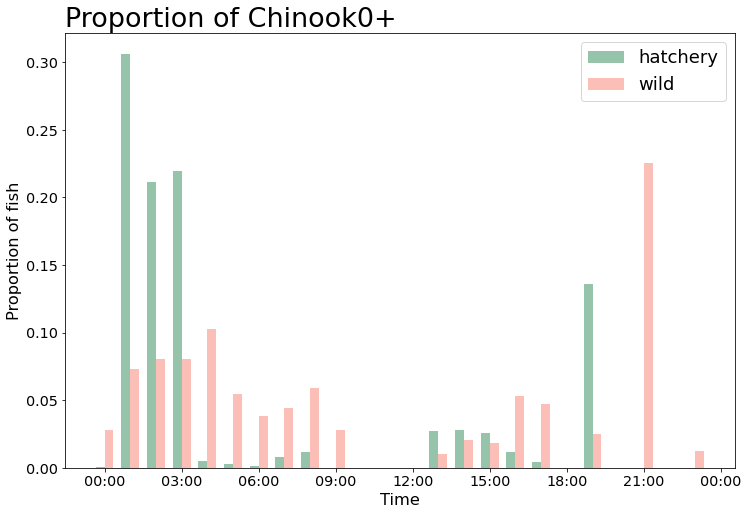

In [80]:
#chinook0
fish_count_by_hour("Chinook","0")

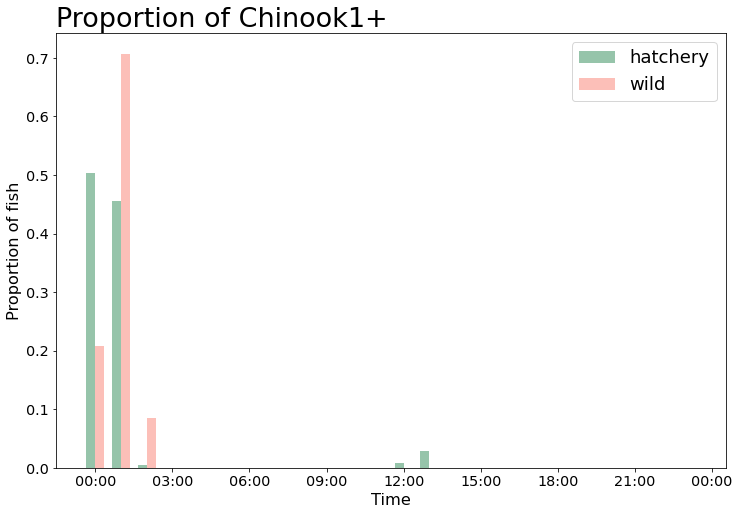

In [58]:
#chinook0
fish_count_by_hour("Chinook","1")

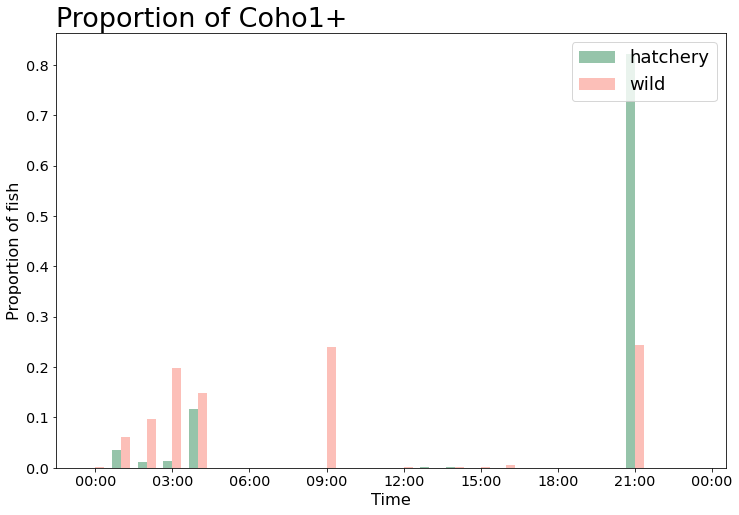

In [59]:
#chinook0
fish_count_by_hour("Coho","1")

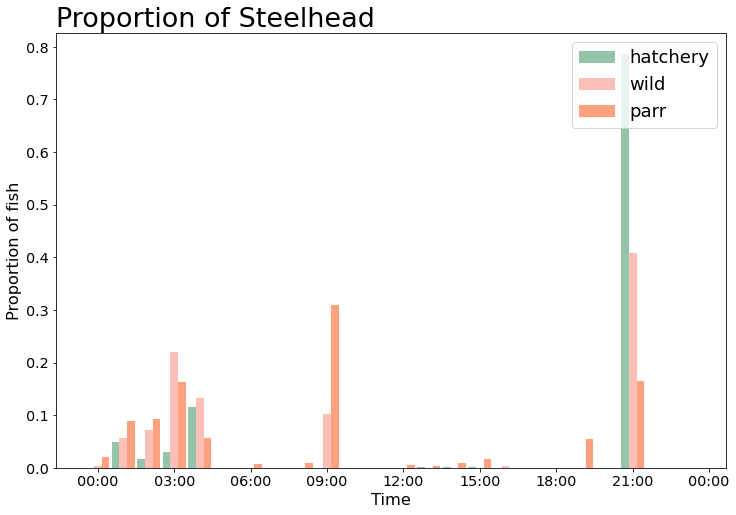

In [61]:
#chinook0
fish_count_by_hour("Steelhead","1")

In [81]:
groupedby_time_year_subset.to_csv("C:/Users/maria/OneDrive/Documents/data/pied_piper/2011_dungeness_time.csv")  


In [1]:
import pandas as pd
year = "2011"
csv_name ="C:/Users/maria/OneDrive/Documents/data/pied_piper/"+str(year)+"_dungeness_all.csv"
df_year_temp_flow = pd.read_csv(csv_name, header=0) 
df_midpoint = df_year_temp_flow.set_index('midpoint')

groupedby_time_year = df_midpoint.groupby(pd.to_datetime(df_midpoint.index).floor('480T').time).sum()
# print(df_midpoint)

groupedby_time_year_subset = groupedby_time_year[['Chinook0_Hat',
                                                  'Chinook0_Hat1',
                                                  'Chinook0_Wild',
                                                  'Chinook1_Hat',
                                                  'Chinook1_Wild',
                                                  'Coho1_Wild',
                                                  'Coho1_Wild1',
                                                  'Coho1_Hat',
                                                  'Coho1_Hat1',
                                                  'Steelhead1_Hat',
                                                  'Steelhead1_Hat1',
                                                  'Steelhead1_Wild',
                                                  'Steelhead1_Wild1',
                                                  'Trout Parr_Wild_Steelhead']].div(groupedby_time_year['In'],axis = 0)

groupedby_time_year_subset['Chinook0_Hat_all'] = (
    groupedby_time_year_subset['Chinook0_Hat']+groupedby_time_year_subset['Chinook0_Hat1'])

groupedby_time_year_subset['Chinook0_Hat_prop'] = groupedby_time_year_subset['Chinook0_Hat_all']/groupedby_time_year_subset['Chinook0_Hat_all'].sum()

groupedby_time_year_subset['Chinook0_Wild_prop'] = groupedby_time_year_subset['Chinook0_Wild']/groupedby_time_year_subset['Chinook0_Wild'].sum()



groupedby_time_year_subset['Chinook1_Hat_all'] = (
    groupedby_time_year_subset['Chinook1_Hat'])

groupedby_time_year_subset['Chinook1_Hat_prop'] = (
    groupedby_time_year_subset['Chinook1_Hat_all'])/groupedby_time_year_subset['Chinook1_Hat_all'].sum()

groupedby_time_year_subset['Chinook1_Wild_prop'] = groupedby_time_year_subset['Chinook1_Wild']/groupedby_time_year_subset['Chinook1_Wild'].sum()



groupedby_time_year_subset['Coho1_Wild_all'] = groupedby_time_year_subset['Coho1_Wild']+groupedby_time_year_subset['Coho1_Wild1']

groupedby_time_year_subset['Coho1_Wild_prop'] = groupedby_time_year_subset['Coho1_Wild_all']/groupedby_time_year_subset['Coho1_Wild_all'].sum()

groupedby_time_year_subset['Coho1_Hat_all'] = (
    groupedby_time_year_subset['Coho1_Hat']+groupedby_time_year_subset['Coho1_Hat1'])


groupedby_time_year_subset['Coho1_Hat_prop'] = groupedby_time_year_subset['Coho1_Hat_all']/groupedby_time_year_subset['Coho1_Hat_all'].sum()



groupedby_time_year_subset['Steelhead1_Wild_all'] = groupedby_time_year_subset['Steelhead1_Wild'] + groupedby_time_year_subset['Steelhead1_Wild1']

groupedby_time_year_subset['Steelhead1_Wild_prop'] = groupedby_time_year_subset['Steelhead1_Wild_all']/groupedby_time_year_subset['Steelhead1_Wild_all'].sum()

groupedby_time_year_subset['Steelhead1_Hat_prop'] = groupedby_time_year_subset['Steelhead1_Hat']/groupedby_time_year_subset['Steelhead1_Hat'].sum()

groupedby_time_year_subset['Steelhead1_Parr_prop'] = groupedby_time_year_subset['Trout Parr_Wild_Steelhead']/groupedby_time_year_subset['Trout Parr_Wild_Steelhead'].sum()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(groupedby_time_year_subset)

,Chinook0_Hat,Chinook0_Hat1,Chinook0_Wild,Chinook1_Hat,Chinook1_Wild,Coho1_Wild,Coho1_Wild1,Coho1_Hat,Coho1_Hat1,Steelhead1_Hat,Steelhead1_Hat1,Steelhead1_Wild,Steelhead1_Wild1,Trout Parr_Wild_Steelhead,Chinook0_Hat_all,Chinook0_Hat_prop,Chinook0_Wild_prop,Chinook1_Hat_all,Chinook1_Hat_prop,Chinook1_Wild_prop,Coho1_Wild_all,Coho1_Wild_prop,Coho1_Hat_all,Coho1_Hat_prop,Steelhead1_Wild_all,Steelhead1_Wild_prop,Steelhead1_Hat_prop,Steelhead1_Parr_prop
00:00:00,0.088404,2.013506,0.297780,0.796795,0.006591,0.102362,0.489321,2.022424,0.013183,0.362144,0.000000,0.369123,0.015122,0.160134,2.101910,0.781577,0.488613,0.796795,0.949351,1.0,0.591683,0.784898,2.035607,0.293611,0.384245,0.726265,0.385189,0.732761
08:00:00,0.017926,0.245327,0.074776,0.042510,0.000000,0.004097,0.027145,0.091165,0.000000,0.010755,0.000000,0.007170,0.000512,0.020999,0.263252,0.097888,0.122696,0.042510,0.050649,0.0,0.031242,0.041444,0.091165,0.013149,0.007682,0.014521,0.011440,0.096088
16:00:00,0.037403,0.286753,0.236883,0.000000,0.000000,0.018701,0.112208,4.762597,0.043636,0.567273,0.006234,0.130909,0.006234,0.037403,0.324156,0.120535,0.388690,0.000000,0.000000,0.0,0.130909,0.173658,4.806234,0.693240,0.137143,0.259215,0.603371,0.171151


In [2]:
groupedby_time_year_subset.to_csv("C:/Users/maria/OneDrive/Documents/data/pied_piper/2011_dungeness_time_daylight.csv")  
